### Aufio ranges

Generally speaking, the most common representation of audio samples is int16 PCM samples. Those samples stores
numbers in the range [$ -2^{15}, 2^{15}-1 $]. Because of the different floating point operations, Smart Meet works by default uses floating point samples ('float32'). Those samples are represented in the 
range: [-1.0, 1.0]. 

Some algorithms are designed to work with fixed point operations. To keep compatibility the framework provides different conversion functions. In this small notebook, we will describe the differences: 

In [1]:
from IPython.display import Audio, display, HTML
from smartmeet.utils.converter import Converter
from smartmeet.io.decoder import Decoder

from librosa.display import waveplot
import matplotlib.pyplot as plt
import numpy as np

Let's start by loading an audio frame from one of the files in the data base:

File properties: Channels=1, SampleRate=22050 Hz


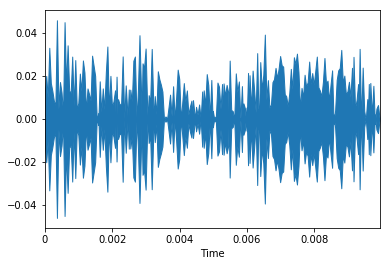

In [ ]:
file = "/home/mboujemaoui/Developer/smartmeet-research-python/resources/data/mssp1.wav"
decoder = Decoder(file=file)

time = 0.01 # Read just one second
samples = int(decoder.sample_rate * time)
data = decoder.read(frames_per_channel=samples)

print("File properties: Channels=%s, SampleRate=%s Hz" % (str(decoder.channels), str(decoder.sample_rate)))
Audio(url=file, embed=False)

plt.figure()
waveplot(data, sr=decoder.sample_rate)

As previously was mentioned, the samples are in the range [-1, 1]. Supose that an algorithm requires fixed point samples
represented by integers of 16 bits. The conversion is quite simple, just call:

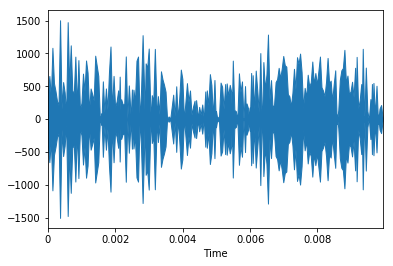

In [3]:
fixed = Converter.fromFloatToInt16(data)
plt.figure()
waveplot(fixed.astype(dtype=np.float32), sr=decoder.sample_rate)

Now, we can call the processing function with the converted data. When the processing is done, we should get back
the data in the right range:

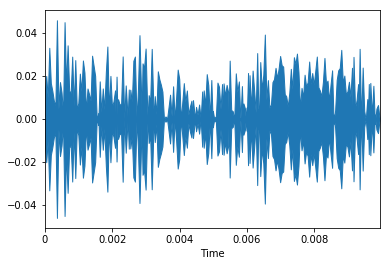

In [4]:
restored = Converter.fromInt16ToFloat(fixed)
plt.figure()
waveplot(restored, sr=decoder.sample_rate)